Housing Price Prediction using Linear Regression

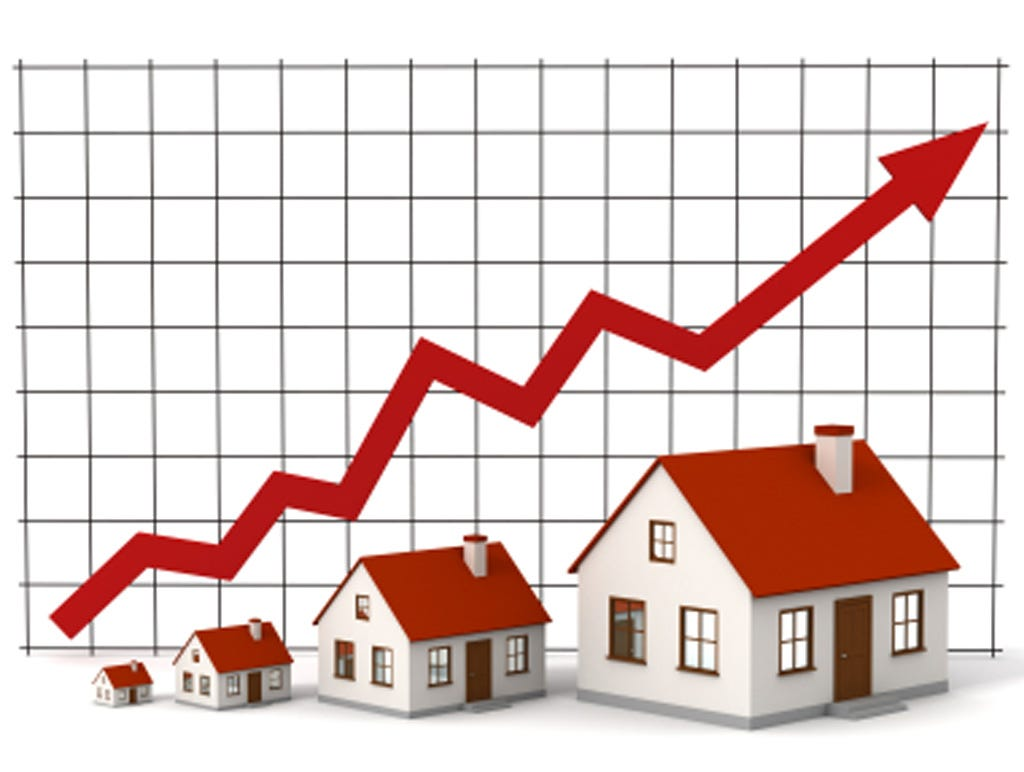

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


import os
for dirname, _, filename in os.walk("D:\\PROJECTS\\New projects\\Housing.csv"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Predicting House Prices using EDA and Linear Regression Model

In [2]:
# Importing Dataset

house_price = pd.read_csv('D:\\PROJECTS\\New projects\\Housing.csv')
house_price.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
house_price.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


# Understanding the Data

In [4]:
print('Rows and columns of the dataset : ', house_price.shape)

Rows and columns of the dataset :  (545, 13)


In [5]:
# Getting some information

In [6]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
house_price.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

# Checking Null values

In [8]:
house_price.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

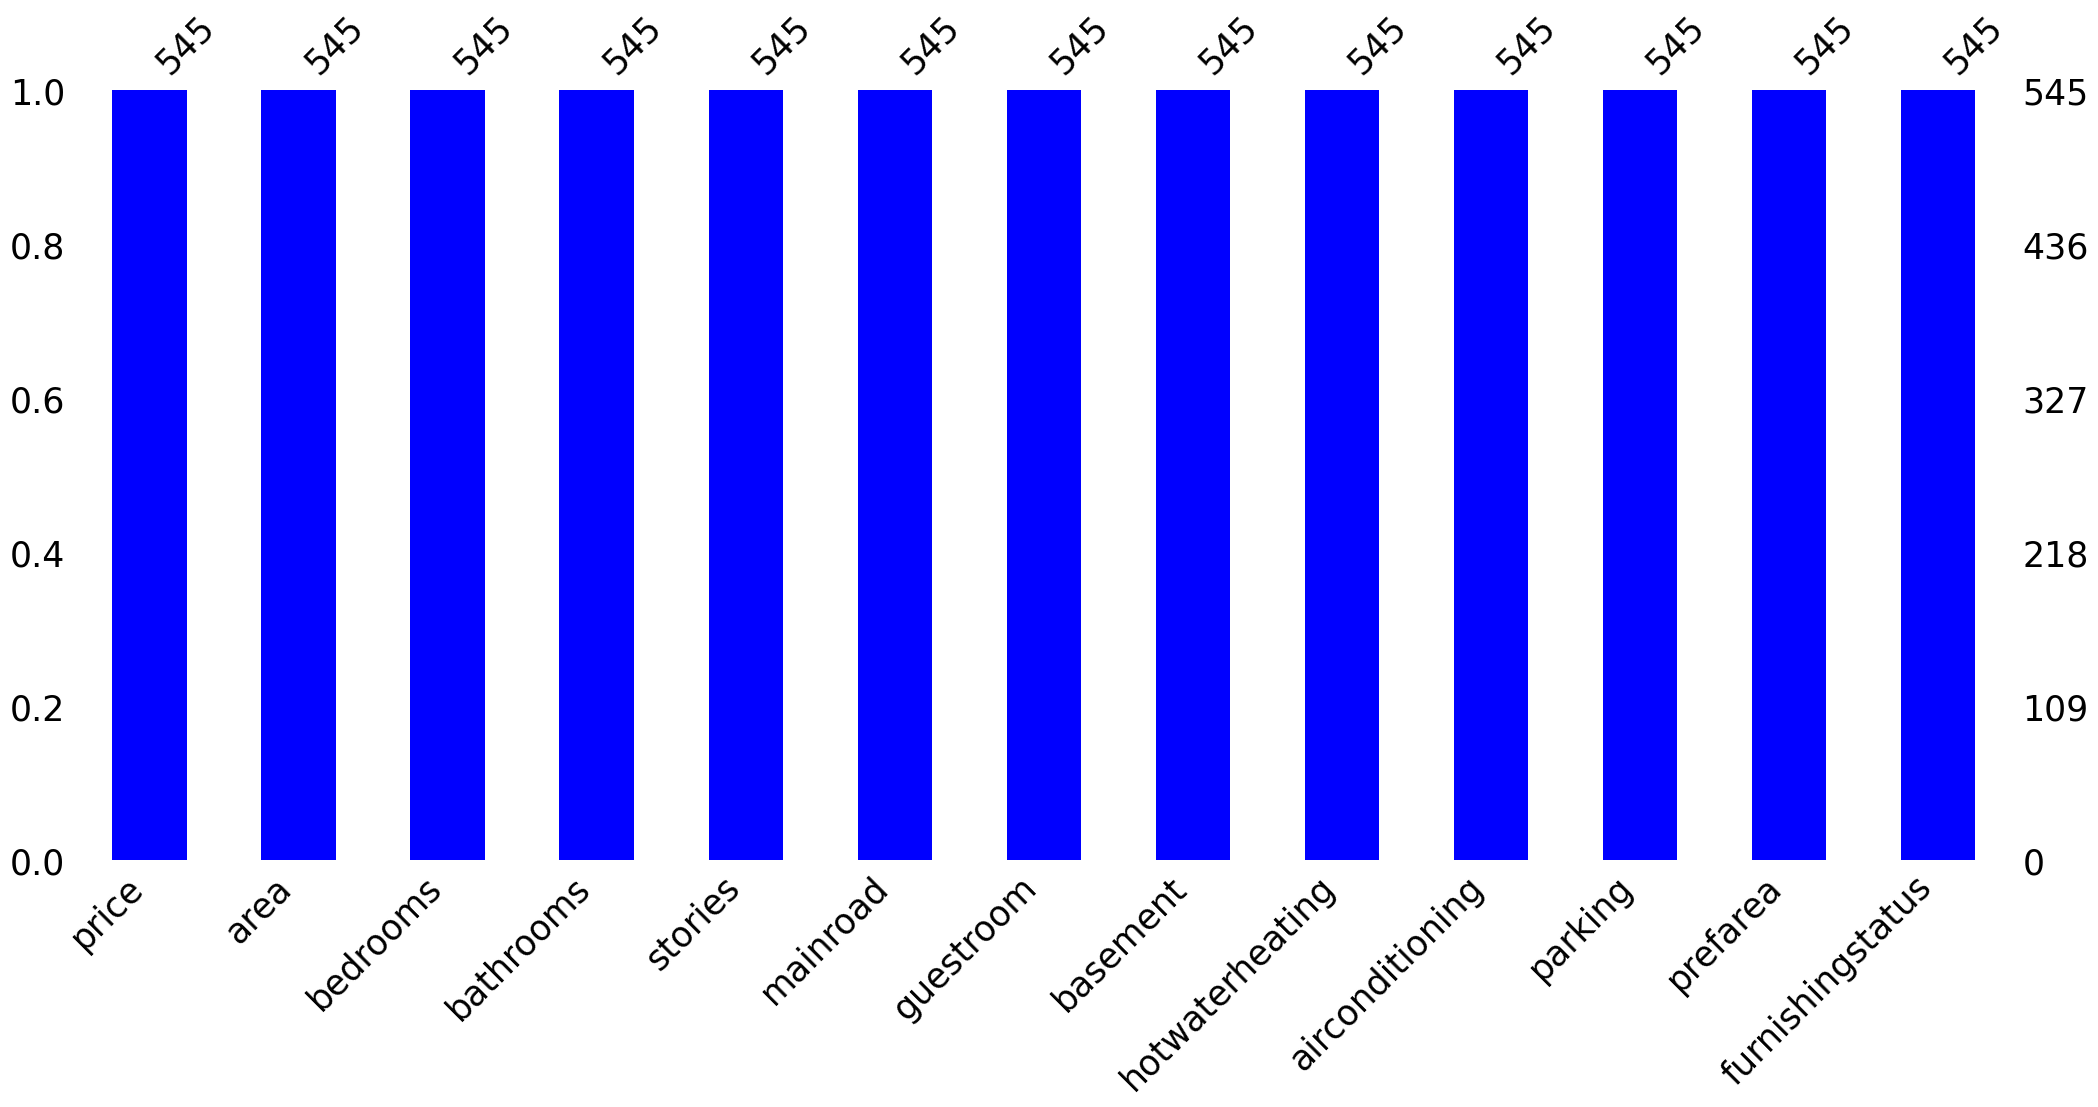

In [9]:
# checking null vallues in visualization
import missingno as msno
msno.bar(house_price, color = 'blue', fontsize = 25);

In [10]:
# checking duplicates
house_price.duplicated().sum()

0

# Exploratory Data Analysis

In [11]:
house_price.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [12]:
categorical_col = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

In [13]:
house_price[categorical_col]

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,yes,no,no,no,yes,yes
1,yes,no,no,no,yes,no
2,yes,no,yes,no,no,yes
3,yes,no,yes,no,yes,yes
4,yes,yes,yes,no,yes,no
...,...,...,...,...,...,...
540,yes,no,yes,no,no,no
541,no,no,no,no,no,no
542,yes,no,no,no,no,no
543,no,no,no,no,no,no


In [15]:
# Converting  Categorical (Yes/No) Variables into Numerical Variables

def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

In [17]:
house_price[categorical_col] = house_price[categorical_col].apply(binary_map)
house_price[categorical_col]

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,1,0,0,0,1,1
1,1,0,0,0,1,0
2,1,0,1,0,0,1
3,1,0,1,0,1,1
4,1,1,1,0,1,0
...,...,...,...,...,...,...
540,1,0,1,0,0,0
541,0,0,0,0,0,0
542,1,0,0,0,0,0
543,0,0,0,0,0,0


In [18]:
house_price.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [20]:
dummy_col = pd.get_dummies(house_price['furnishingstatus'])



dummy_col.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [26]:
house_price = pd.concat([house_price, dummy_col], axis = 1)
house_price.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,1,0,0


In [27]:
house_price.drop(['furnishingstatus'], axis = 1, inplace = True)
house_price.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0


# Splitting data into Training and Testing data

In [28]:
house_price.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnished', 'semi-furnished', 'unfurnished'],
      dtype='object')

In [31]:
np.random.seed(0)
hp_train, hp_test = train_test_split(house_price, train_size = 0.7, test_size = 0.3, random_state = 100)

In [33]:
hp_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
359,3710000,3600,3,1,1,1,0,0,0,0,1,0,0,0,1
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,0,1,0
159,5460000,3150,3,2,1,1,1,1,0,1,0,0,1,0,0
35,8080940,7000,3,2,4,1,0,0,0,1,2,0,1,0,0
28,8400000,7950,5,2,2,1,0,1,1,0,2,0,0,0,1


In [34]:
hp_train.shape

(381, 15)

In [35]:
hp_test.shape

(164, 15)

# Scaling Training Data: MinMaxScaler

In [36]:
scaler = MinMaxScaler()

In [37]:
col_scale = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']

In [38]:
hp_train[col_scale] = scaler.fit_transform(hp_train[col_scale])

# Training the Model

In [39]:
y_train = hp_train.pop('price')
x_train = hp_train

In [40]:
regression = LinearRegression()

In [42]:
regression.fit(x_train, y_train)

LinearRegression()

In [43]:
coefficients = regression.coef_
print(coefficients)

[ 0.23466354  0.04673453  0.19082319  0.10851563  0.05044144  0.03042826
  0.02159488  0.08486327  0.06688093  0.06073533  0.05942788  0.01002836
  0.01094888 -0.02097725]


In [44]:
score = regression.score(x_train, y_train)
print(score)

0.6814893088451202


# Scaling Test Data: MinMaxScaler

In [45]:
col_scale = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']

In [46]:
hp_test[col_scale] = scaler.fit_transform(hp_test[col_scale])

# Testing our Model

In [47]:
y_test = hp_test.pop('price')
x_test = hp_test

In [49]:
prediction = regression.predict(x_test)

In [52]:
# Checking R Square value

r2 = r2_score(y_test, prediction)

In [53]:
print(r2)

0.5995575338728527


# Comparing the actual and predicted values

In [54]:
y_test.shape
y_test_metrics = y_test.values.reshape(-1,1)

In [55]:
df = pd.DataFrame({'actual' : y_test_metrics.flatten(), 'predicted': prediction.flatten()})

In [56]:
df.head(10)

,actual,predicted
0,0.247651,0.202410
1,0.530201,0.374464
2,0.328859,0.305654
3,0.261745,0.293786
4,0.245638,0.258827
5,0.275168,0.189463
6,0.644295,0.499099
7,0.328859,0.297637
8,0.087248,0.122528
9,0.395973,0.316860


# Plotting the Graph

Text(0, 0.5, 'Predicted ')

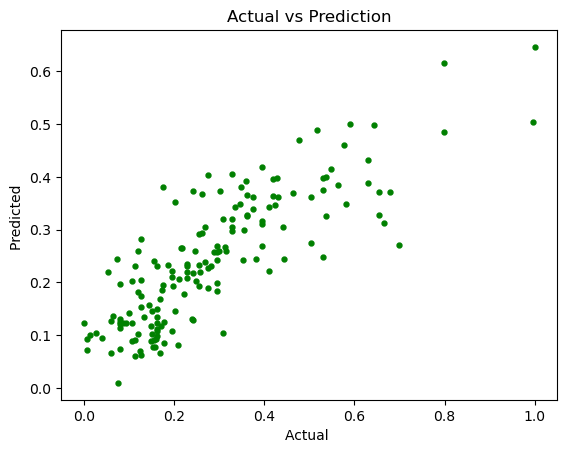

In [73]:
# Creating a new figure
fig = plt.figure()

# Scatter plot of actual verses predicted values
plt.scatter(y_test, prediction, c="green", s=50, marker=".")

# Set the title and labels for the plot
plt.title('Actual vs Prediction')
plt.xlabel('Actual ', fontsize = 10)
plt.ylabel('Predicted ', fontsize = 10)

# Mean Squared Error

In [59]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, prediction)
print(" Mean Squared Error : ", mse)

 Mean Squared Error :  0.014451840099238345


In [60]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
knn_model = KNeighborsRegressor(n_neighbors = 5)
knn_model.fit(x_train, y_train)
knn_y_pred = knn_model.predict(x_test)
knn_mse = mean_squared_error(y_test, knn_y_pred)
knn_r2 = r2_score(y_test, knn_y_pred)

In [61]:
print(" Mean Squared Error : ",knn_mse)
print("R Squared : ",knn_r2)

 Mean Squared Error :  0.01761873619622445
R Squared :  0.5118067924906263


In [62]:
decision_tree_model = DecisionTreeRegressor(random_state =42)
decision_tree_model.fit(x_train, y_train)
decision_tree_prediction = decision_tree_model.predict(x_test)

In [63]:
decision_tree_mse = mean_squared_error(y_test, decision_tree_prediction)
decision_tree_r2 = r2_score(y_test, decision_tree_prediction)

In [64]:
print("Mean Squared Error : ", decision_tree_mse)
print("R Squared : ", decision_tree_r2)

Mean Squared Error :  0.027388614548499227
R Squared :  0.24109564745427003


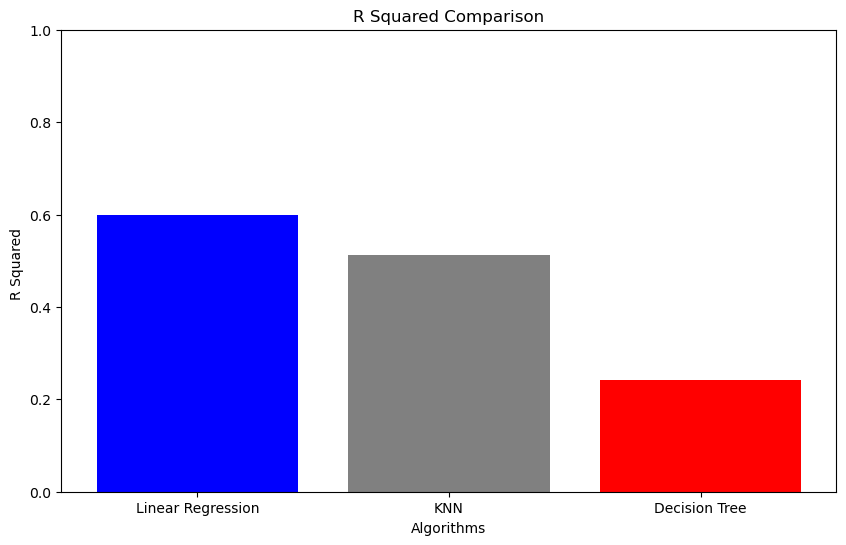

In [66]:
algorithms = ['Linear Regression', 'KNN', 'Decision Tree']
r2_scores = [r2, knn_r2, decision_tree_r2]

plt.figure(figsize = (10,6))
plt.bar(algorithms, r2_scores, color = ['blue', 'grey', 'red'])
plt.title('R Squared Comparison')
plt.xlabel('Algorithms', fontsize = 10)
plt.ylabel('R Squared ', fontsize = 10)
plt.ylim(0,1)
plt.show()

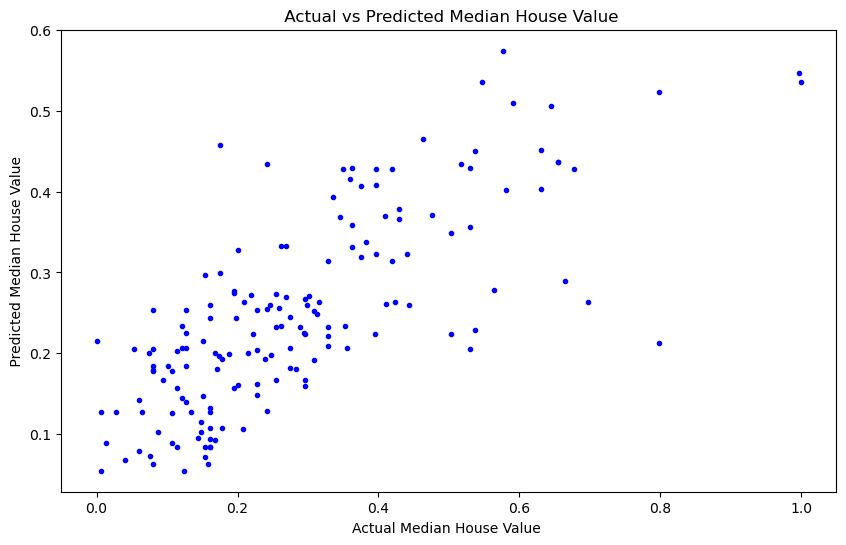

In [67]:
plt.figure(figsize = (10,6))
plt.scatter(y_test, knn_y_pred, c="blue", marker = ".")
plt.title(" Actual vs Predicted Median House Value")
plt.xlabel("Actual Median House Value ", fontsize = 10)
plt.ylabel(" Predicted Median House Value ", fontsize = 10)
plt.show()

# Decision Tree Scatter Graph

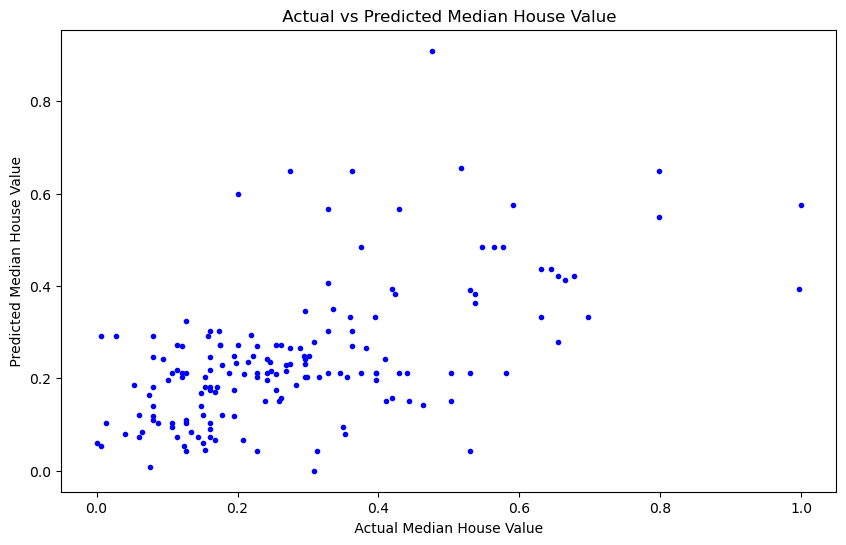

In [69]:
plt.figure(figsize = (10,6))
plt.scatter(y_test, decision_tree_prediction, c="blue", marker = ".")
plt.title(" Actual vs Predicted Median House Value ")
plt.xlabel(" Actual Median House Value ", fontsize  = 10)
plt.ylabel(" Predicted Median House Value ", fontsize = 10)
plt.show()